In [2]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils

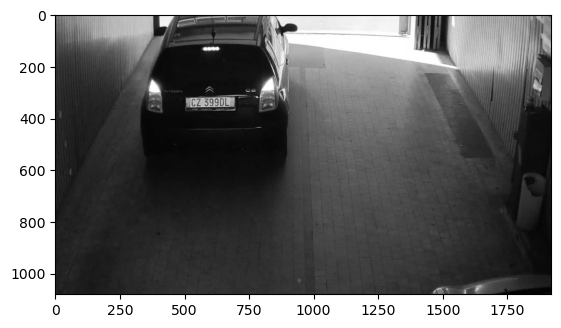

In [3]:

image = cv2.imread('plate10.jpg')
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#cv2.imshow('Original Image',image)
#cv2.imshow('Grayscale Image',gray_image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))




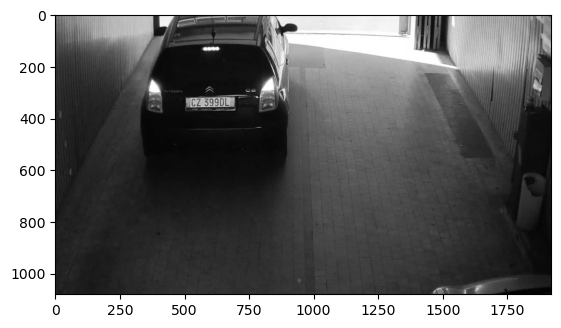

In [4]:
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))

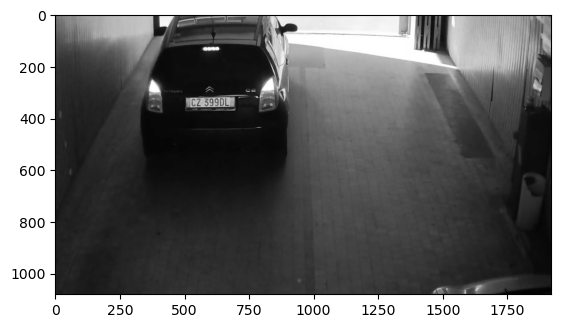

In [5]:
bfilter = cv2.bilateralFilter(gray_image, 11,17,17)#noise reduction
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB))

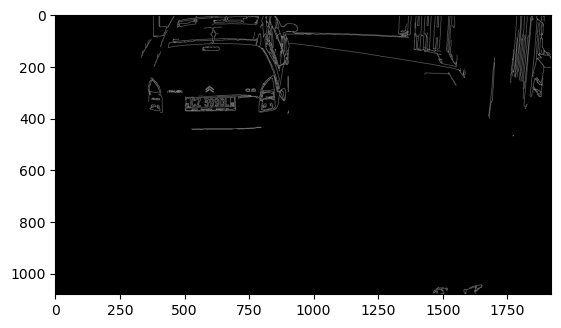

In [6]:
edged = cv2.Canny(bfilter, 30, 200)#Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [7]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse = True)[:10]


In [8]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx) == 4:
        location = approx
        break

In [9]:
location

array([[[694, 321]],

       [[508, 324]],

       [[507, 355]],

       [[693, 357]]], dtype=int32)

In [10]:
interpolation = cv2.INTER_LINEAR


In [11]:
# mask = np.zeros(gray_image.shape, np.uint8)
# new_image = cv2.drawContours(mask, [location], 0,255,-1)
# new_image = cv2.bitwise_and(image, image, mask=mask)
# new_image = cv2.resize(new_image, new_image, Size(), 0.5, 0.5, interpolation);


In [12]:
mask = np.zeros(gray_image.shape, np.uint8)
cv2.drawContours(mask, [location], 0, 255, -1)
masked_image = cv2.bitwise_and(image, image, mask=mask)
new_image = cv2.resize(masked_image, (0, 0), fx=0.5, fy=0.5, interpolation=interpolation)

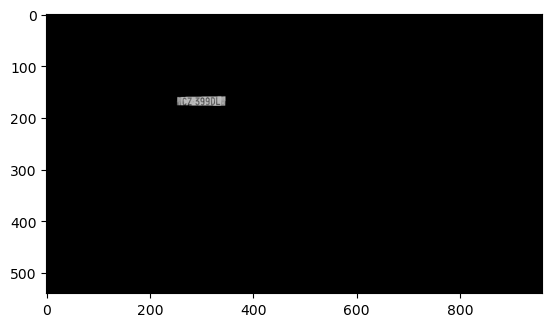

In [13]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [14]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_image = gray_image[x1:x2+1, y1:y2+1]

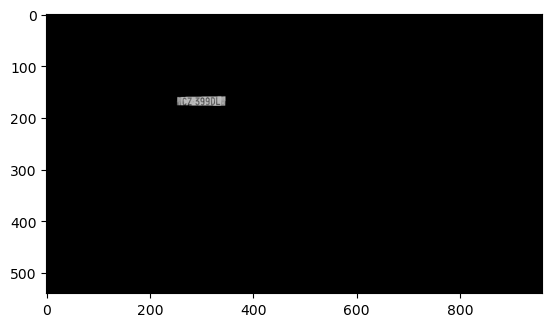

In [15]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

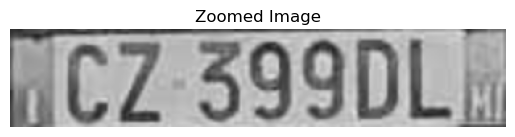

In [16]:
if location is not None:
    # Get bounding rectangle
    x, y, w, h = cv2.boundingRect(location)

    # Crop the image to the bounding rectangle
    cropped_image = gray_image[y:y+h, x:x+w]

    # Optionally resize to zoom in further
    zoom_factor = 2  # Adjust the zoom factor as needed
    zoomed_image = cv2.resize(cropped_image, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_LINEAR)

    # Save the zoomed image
    cv2.imwrite('zoomed_image.jpg', zoomed_image)

    # Display the zoomed image using matplotlib
    zoomed_image_rgb = cv2.cvtColor(zoomed_image, cv2.COLOR_BGR2RGB)
    plt.imshow(zoomed_image_rgb)
    plt.title('Zoomed Image')
    plt.axis('off')  # Hide axis
    plt.show()
else:
    print("No contour with 4 vertices found.")

In [17]:
reader = easyocr.Reader(['en'])
result = reader.readtext(zoomed_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[21, 0], [349, 0], [349, 74], [21, 74]], 'CZ 399DL', 0.7940106413033746)]

In [18]:
# zoom_factor = 2  # Adjust the zoom factor as needed
# zoomed_image = cv2.resize(cropped_image, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_LINEAR)
# cv2.imshow('Zoomed Image', zoomed_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [19]:
# if location is not None:
#     # Get bounding rectangle
#     x, y, w, h = cv2.boundingRect(location)

#     # Crop the image to the bounding rectangle
#     cropped_image = masked_image[y:y+h, x:x+w]

#     # Optionally resize to zoom in further
#     zoom_factor = 2  # Adjust the zoom factor as needed
#     zoomed_image = cv2.resize(cropped_image, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_LINEAR)

#     # Save the zoomed image
#     cv2.imwrite('zoomed_image.jpg', zoomed_image)

#     # Display the zoomed image using matplotlib
#     zoomed_image_rgb = cv2.cvtColor(zoomed_image, cv2.COLOR_BGR2RGB)
#     plt.imshow(zoomed_image_rgb)
#     plt.title('Zoomed Image')
#     plt.axis('off')  # Hide axis
#     plt.show()
# else:
#     print("No contour with 4 vertices found.")